<a href="https://colab.research.google.com/github/kaushikk18/100-days-of-code/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


DFS


Following is DFS from (starting from vertex A)
A B D F E C G 

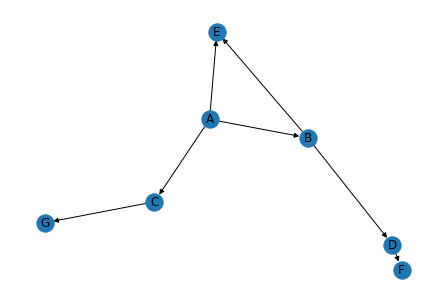

In [1]:
import networkx as nx

#FUNCTION TO SOLVE DFS
def solveDFS(graph, v, visited) :
  visited.add(v) # Add the current element node to visited (visited is of type set)
  print(v, end=' ') # Print the current node
  for neighbour in graph[v] : # Traverse through all neighbours of current node
    if neighbour not in visited : # Check whether the neighbour is not in visited
      solveDFS(graph, neighbour, visited) # If yes, then repeat the above same steps for that neighbour
g = nx.DiGraph() # Create a Directed Graph using NetworkX

#CREATE A GRAPH USING NETWORKX
g.add_edges_from([('A','B'),('A','C'),('C','G'),('B','D'),('B','E'),('D','F'),('A','E')]) # Add edges for that graph
nx.draw(g, with_labels=True) # Graph Visualization

#SOLVE DFS FOR THAT GRAPH
print("Following is DFS from (starting from vertex A)")
visited = set()
solveDFS(g, 'A', visited)

Water jug problem

In [2]:

# This function is used to initialize the 
# dictionary elements with a default value.
from collections import defaultdict
  
# jug1 and jug2 contain the value 
# for max capacity in respective jugs 
# and aim is the amount of water to be measured. 
jug1, jug2, aim = 4, 3, 2
  
# Initialize dictionary with 
# default value as false.
visited = defaultdict(lambda: False)
  
# Recursive function which prints the 
# intermediate steps to reach the final 
# solution and return boolean value 
# (True if solution is possible, otherwise False).
# amt1 and amt2 are the amount of water present 
# in both jugs at a certain point of time.
def waterJugSolver(amt1, amt2): 
  
    # Checks for our goal and 
    # returns true if achieved.
    if (amt1 == aim and amt2 == 0) or (amt2 == aim and amt1 == 0):
        print(amt1, amt2)
        return True
      
    # Checks if we have already visited the
    # combination or not. If not, then it proceeds further.
    if visited[(amt1, amt2)] == False:
        print(amt1, amt2)
      
        # Changes the boolean value of
        # the combination as it is visited. 
        visited[(amt1, amt2)] = True
      
        # Check for all the 6 possibilities and 
        # see if a solution is found in any one of them.
        return (waterJugSolver(0, amt2) or
                waterJugSolver(amt1, 0) or
                waterJugSolver(jug1, amt2) or
                waterJugSolver(amt1, jug2) or
                waterJugSolver(amt1 + min(amt2, (jug1-amt1)),
                amt2 - min(amt2, (jug1-amt1))) or
                waterJugSolver(amt1 - min(amt1, (jug2-amt2)),
                amt2 + min(amt1, (jug2-amt2))))
      
    # Return False if the combination is 
    # already visited to avoid repetition otherwise
    # recursion will enter an infinite loop.
    else:
        return False
  
print("Steps: ")
  
# Call the function and pass the
# initial amount of water present in both jugs.
waterJugSolver(0, 0)

Steps: 
0 0
4 0
4 3
0 3
3 0
3 3
4 2
0 2


True

8-queen

In [6]:
import itertools
N=int(input("4/8"))
sol=0
cols=range(N)

for entry in itertools.permutations(cols):

  if N==(len(set(entry[j]+j for j in cols)))==(len(set(entry[j]-j for j in cols))):

    sol+=1
    print(f"Solution {sol} : {entry}")
    print('\n'.join('x'*i+'Q'+'x'*(N-i-1) for i in entry)+"\n\n\n")

4/84
Solution 1 : (1, 3, 0, 2)
xQxx
xxxQ
Qxxx
xxQx



Solution 2 : (2, 0, 3, 1)
xxQx
Qxxx
xxxQ
xQxx





A*

In [7]:
from collections import deque

class Graph:
    def _init_(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])

        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0

        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start

        while len(open_lst) > 0:
            n = None

            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []

                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]

                reconst_path.append(start)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n

                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)

            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)

        print('Path does not exist!')
        return None

Decision Tree

In [8]:
from sklearn import tree 
#Using DecisionTree classifier for prediction 
clf = tree.DecisionTreeClassifier() 
#Here the array contains three values which are height,weight and shoe size 
X = [[181, 80, 91], [182, 90, 92], [183, 100, 92], [184, 200, 93], [185, 300, 94], [186, 400, 95], 
[187, 500, 96], [189, 600, 97], [190, 700, 98], [191, 800, 99], [192, 900, 100], [193, 1000, 101]] 
Y = ['male', 'male', 'female', 'male' , 'female', 'male', 'female' , 'male' , 'female', 'male' , 'female' , 
'male' ] 
clf = clf.fit(X, Y) 
#Predicting on basis of given random values for each given feature 
predictionf = clf.predict([[181, 80, 91]])
predictionm = clf.predict([[183, 100, 92]])
#Printing final prediction 
print(predictionf)
print(predictionm)

['male']
['female']


Regression

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X, y = make_regression(n_samples=1000, noise=0.05, n_features=100)
X.shape, y.shape = ((1000, 100), (1000,))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state
=42)
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, y_train)
print(f"R2 Score for Training Data = {clf.score(X_train, y_train)}")
print(f"R2 Score for Test Data = {clf.score(X_test, y_test)}")

R2 Score for Training Data = 0.999952319837485
R2 Score for Test Data = 0.9794933037109281


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


K means

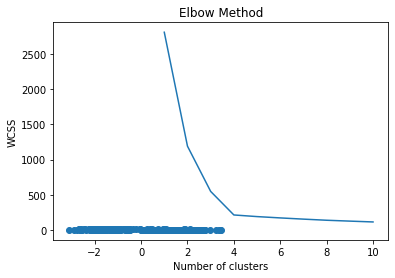

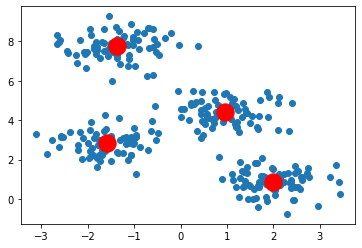

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()